```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         09/23/2017
Name:         Pradnya Nimkar
```

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from time import sleep
import datetime
import dateutil
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **Challenge** 1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}


In [4]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,00:00:00,REGULAR,6319633,2138801
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,04:00:00,REGULAR,6319649,2138805
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,08:00:00,REGULAR,6319661,2138821
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,12:00:00,REGULAR,6319759,2138889


In [5]:
df.shape

(198419, 11)

In [6]:
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
198409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/11/2017,13:00:00,REGULAR,5554,315
198410,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/11/2017,17:00:00,REGULAR,5554,315
198411,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/11/2017,21:00:00,REGULAR,5554,315
198412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,01:00:00,REGULAR,5554,315
198413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,05:00:00,REGULAR,5554,315
198414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,09:00:00,REGULAR,5554,315
198415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,13:00:00,REGULAR,5554,315
198416,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,17:00:00,REGULAR,5554,315
198417,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/12/2017,21:00:00,REGULAR,5554,315
198418,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/13/2017,01:00:00,REGULAR,5554,315


# **Challenge 2**
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [7]:
df["DATETIME"]=(df["DATE"]+' '+df["TIME"]).apply(dateutil.parser.parse)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,2017-09-09 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,2017-09-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,2017-09-09 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779,2017-09-09 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,00:00:00,REGULAR,6319633,2138801,2017-09-10 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,04:00:00,REGULAR,6319649,2138805,2017-09-10 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,08:00:00,REGULAR,6319661,2138821,2017-09-10 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,12:00:00,REGULAR,6319759,2138889,2017-09-10 12:00:00


In [8]:
df = df.rename(columns=lambda x: x.strip())
df1 = df.drop(["LINENAME", "DESC", "DATE", "TIME", "DIVISION", "EXITS", "DATE2"], axis=1,errors="ignore")
df1.head()

,C/A,UNIT,SCP,STATION,ENTRIES,DATETIME
0,A002,R051,02-00-00,59 ST,6318862,2017-09-09 00:00:00
1,A002,R051,02-00-00,59 ST,6318888,2017-09-09 04:00:00
2,A002,R051,02-00-00,59 ST,6318905,2017-09-09 08:00:00
3,A002,R051,02-00-00,59 ST,6318985,2017-09-09 12:00:00
4,A002,R051,02-00-00,59 ST,6319212,2017-09-09 16:00:00


# **Challenge 3**

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [9]:
df_daily = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [10]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,09/09/2017,6318862
1,A002,R051,02-00-00,59 ST,09/10/2017,6319633
2,A002,R051,02-00-00,59 ST,09/11/2017,6320260
3,A002,R051,02-00-00,59 ST,09/12/2017,6322021
4,A002,R051,02-00-00,59 ST,09/13/2017,6323746


# **Challenge** 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)



In [22]:
plt.figure(figsize=(10,3))
df["DATE2"] = df['DATETIME'].dt.strftime('%m/%d/%Y')
single_turnstile = df.loc[(df["C/A"] == "A002") & (df["UNIT"] == "R051") & (df["SCP"] == "02-00-00") & (df["STATION"] == "59 ST") ]

single_turnstile.tail() # To verify there are 7*6 = 42 entries in total

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DATE2,TOTALENTRIES,TOTALEXITS
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2017,04:00:00,REGULAR,6326949,2141024,2017-09-15 04:00:00,09/15/2017,27.000,6.000
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2017,08:00:00,REGULAR,6326988,2141138,2017-09-15 08:00:00,09/15/2017,39.000,114.000
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2017,12:00:00,REGULAR,6327129,2141385,2017-09-15 12:00:00,09/15/2017,141.000,247.000
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2017,16:00:00,REGULAR,6327455,2141452,2017-09-15 16:00:00,09/15/2017,326.000,67.000
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2017,20:00:00,REGULAR,6328220,2141516,2017-09-15 20:00:00,09/15/2017,765.000,64.000


In [23]:
df["TOTALENTRIES"] = df['ENTRIES'] - df['ENTRIES'].shift(1) # Finding incremental entries
df["TOTALEXITS"] = df['EXITS'] - df['EXITS'].shift(1) # Finding incremental exits
dates = single_turnstile["DATE2"].unique()
df.head()
counts = single_turnstile.groupby(["DATE2"]) [["TOTALENTRIES"]].sum().reset_index()
#print(dates)
counts.head()

,DATE2,TOTALENTRIES
0,09/09/2017,629.000
1,09/10/2017,652.000
2,09/11/2017,1607.000
3,09/12/2017,1756.000
4,09/13/2017,1588.000


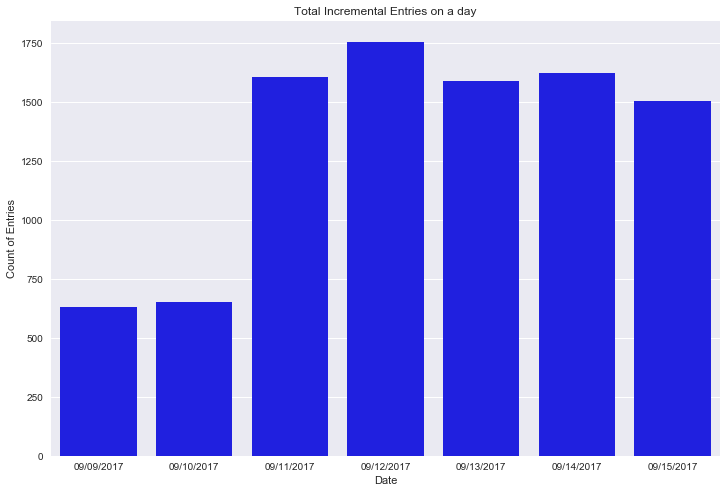

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='DATE2',y='TOTALENTRIES',data=counts,color='blue')
plt.xlabel('Date')
plt.title("Total Incremental Entries on a day" )
plt.ylabel("Count of Entries")

# **Challenge 5**

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


In [28]:
df["TOTALTRAFFIC"] = df["TOTALENTRIES"] + df["TOTALEXITS"]

df_cleaned = df[(df['TOTALENTRIES'] > 0) & (df['TOTALEXITS'] > 0) & (df['TOTALENTRIES'] < 5000) & (df['TOTALEXITS'] < 5000)]

combined_turnstile = df_cleaned.loc[(df_cleaned["C/A"] == "A002") & (df_cleaned["UNIT"] == "R051") & (df_cleaned["STATION"] == "59 ST") ]

combined_turnstile["SCP"].unique() # Looks like there are 12 turnstiles at this location.

combined_turnstile.columns


Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'DATE2', 'TOTALENTRIES',
       'TOTALEXITS', 'TOTALTRAFFIC'],
      dtype='object')

In [29]:
combined_turnstile.groupby(["SCP", "DATE"]) [["TOTALENTRIES"]].sum()

TOTALENTRIES
SCP      DATE                    
02-00-00 09/09/2017       629.000
         09/10/2017       652.000
         09/11/2017      1607.000
         09/12/2017      1756.000
         09/13/2017      1588.000
         09/14/2017      1611.000
         09/15/2017      1504.000
02-00-01 09/09/2017       512.000
         09/10/2017       423.000
         09/11/2017       730.000
         09/12/2017       849.000
         09/13/2017       898.000
...                           ...
02-03-06 09/11/2017      1547.000
         09/12/2017      1666.000
         09/13/2017      1872.000
         09/14/2017      1804.000
         09/15/2017      1764.000
02-06-00 09/09/2017       707.000
         09/10/2017       546.000
         09/11/2017      1546.000
         09/12/2017      1685.000
         09/13/2017      1731.000
         09/14/2017      2068.000
         09/15/2017      1686.000

[70 rows x 1 columns]

# **Challenge 6**

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [30]:
station = combined_turnstile.groupby(["DATE"]) ["TOTALTRAFFIC"].sum().reset_index() # without this reset_index DATE column would be an index
station

,DATE,TOTALTRAFFIC
0,09/09/2017,10219.000
1,09/10/2017,9905.000
2,09/11/2017,20969.000
3,09/12/2017,22559.000
4,09/13/2017,22279.000
5,09/14/2017,23455.000
6,09/15/2017,22525.000


# **Challenge 7**

Plot the time series for a station.

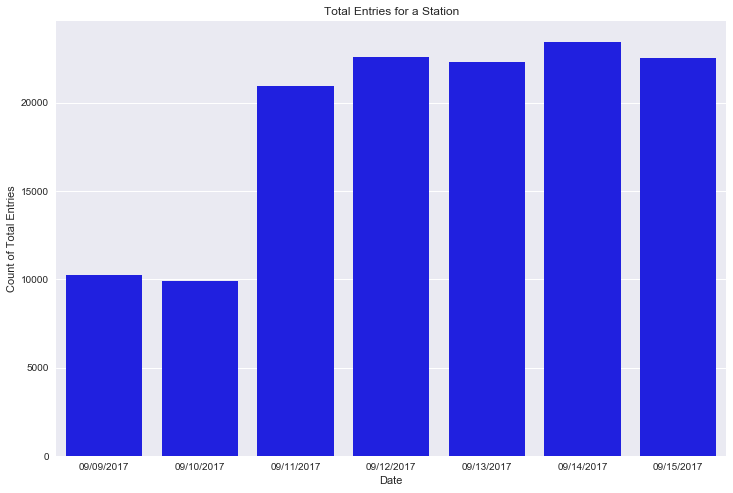

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='DATE',y='TOTALTRAFFIC',data=station,color='blue')
plt.xlabel("Date")
plt.title("Total Entries for a Station")
plt.ylabel("Count of Total Entries")

# **Challenge 8**

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


In [170]:
a = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')
b = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170909.txt')
c = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170902.txt')

df3 = pd.concat([a, b, c])

In [182]:
df3.shape

(580895, 11)

In [277]:
# Data Cleaning again
df3 = df3.rename(columns=lambda x: x.strip())
df3["DATETIME"]=(df3["DATE"]+' '+df3["TIME"]).apply(dateutil.parser.parse)
df3["DATE2"] = df3['DATETIME'].dt.strftime('%m/%d/%Y')
df3["TOTALENTRIES"] = df3['ENTRIES'] - df3['ENTRIES'].shift(1) # Finding incremental entries
df3["TOTALEXITS"] = df3['EXITS'] - df3['EXITS'].shift(1) # Finding incremental exits
df3["TOTALTRAFFIC"] = df3["TOTALENTRIES"] + df3["TOTALEXITS"]
df3["DAYOFWEEK"] = df3['DATETIME'].apply(lambda x: x.weekday())
df_cleaned3 = df3[(df3['TOTALENTRIES'] > 0) & (df3['TOTALEXITS'] > 0) & (df3['TOTALENTRIES'] < 5000) & (df3['TOTALEXITS'] < 5000)]
df_cleaned.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DATE2,TOTALENTRIES,TOTALEXITS,TOTALTRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00,09/09/2017,26.000,5.000,31.000
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00,09/09/2017,17.000,35.000,52.000
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,2017-09-09 12:00:00,09/09/2017,80.000,85.000,165.000
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,2017-09-09 16:00:00,09/09/2017,227.000,62.000,289.000
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779,2017-09-09 20:00:00,09/09/2017,279.000,48.000,327.000


In [278]:
station = df_cleaned3.loc[(df_cleaned3["STATION"] == "59 ST")]

In [279]:
station.shape
station.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DATE2,TOTALENTRIES,TOTALEXITS,TOTALTRAFFIC,DAYOFWEEK
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00,08/27/2016,21.000,3.000,24.000,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00,08/27/2016,29.000,35.000,64.000,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00,08/27/2016,118.000,76.000,194.000,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00,08/27/2016,223.000,59.000,282.000,5
5,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,20:00:00,REGULAR,5800121,1966271,2016-08-27 20:00:00,08/27/2016,288.000,57.000,345.000,5


In [286]:
station["DAYOFWEEK"].unique()

array([5, 6, 0, 1, 2, 3, 4])

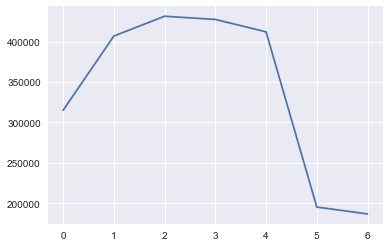

In [288]:
week_count_list = station.groupby(['DAYOFWEEK']) ['TOTALTRAFFIC'].sum()
week_count_list.head()
plt.plot(week_count_list)

# **Challenge 9**

Over multiple weeks, sum total ridership for each station and sort
them, so you can find out the stations with the highest traffic during the time you investigate

In [262]:
df_cleaned3_grouped = df_cleaned3 \
.groupby('STATION').sum() \
.drop(['ENTRIES','EXITS',"TOTALENTRIES",'TOTALEXITS'], axis=1) \
.reset_index()

In [266]:
df_cleaned3_grouped_top = df_cleaned3_grouped \
.sort_values('TOTALTRAFFIC',ascending=False) \
.head(20)

In [267]:
df_cleaned3_grouped_top

,STATION,TOTALTRAFFIC
61,34 ST-PENN STA,5376013.000
230,GRD CNTRL-42 ST,4653774.000
59,34 ST-HERALD SQ,3791721.000
14,14 ST-UNION SQ,3456587.000
46,23 ST,3421755.000
109,86 ST,3288448.000
347,TIMES SQ-42 ST,3228687.000
223,FULTON ST,2936221.000
68,42 ST-PORT AUTH,2770793.000
85,59 ST,2374774.000


# ** Challenge 10**

-Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.



(array([ 4.,  5.,  2.,  2.,  4.,  1.,  0.,  0.,  1.,  1.]),
 array([ 1566555. ,  1947500.8,  2328446.6,  2709392.4,  3090338.2,
         3471284. ,  3852229.8,  4233175.6,  4614121.4,  4995067.2,
         5376013. ]),
 <a list of 10 Patch objects>)

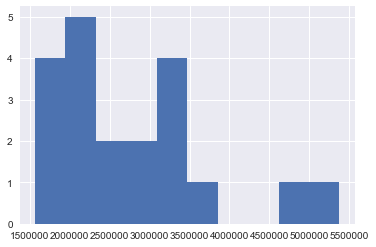

In [269]:
plt.hist(df_cleaned3_grouped_top["TOTALTRAFFIC"])

This distibution is right skewed. 

The peak of the distribution is on the left hand side  ==> most stations have a small traffic (mode)

The tail is on the right hand side ==> large traffic volumes have small bars.
